# Imports

In [2]:
import sys
sys.path.append('../src')

from data_manager import read_frame

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cv2
from skimage import color

data_path = '../data'

# Data

In [3]:
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')

H, W, C = 720, 1280, 3
N = 2020

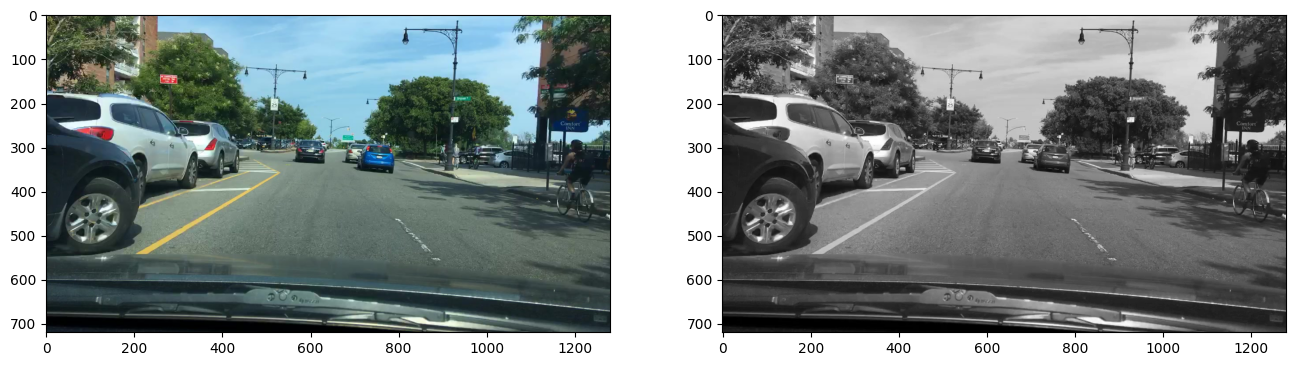

In [4]:
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
frame = read_frame(data_path, train_df, 0)
gray_frame = (color.rgb2gray(frame)*255).astype(np.uint8)

plt.figure(figsize=(16,9))

plt.subplot(1, 2, 1)
plt.imshow(frame)

plt.subplot(1, 2, 2)
plt.imshow(gray_frame, cmap='gray')

plt.show()

# Sliding window

In [60]:
# def slide_window_helper(
#     img, 
#     x_start_stop=[None, None], y_start_stop=[None, None], 
#     window_size=[96, 64]
# ):
    
#     window_size_x = window_size[0]
#     window_size_y = window_size[1]
#     xy_overlap=(0.5, 0.5)

#     # If x and/or y start/stop positions not defined, set to image size
#     if x_start_stop[0] == None:
#         x_start_stop[0] = 0
#     if x_start_stop[1] == None:
#         x_start_stop[1] = img.shape[1]
#     if y_start_stop[0] == None:
#         y_start_stop[0] = 0
#     if y_start_stop[1] == None:
#         y_start_stop[1] = img.shape[0]

#     # Compute the span of the region to be searched    
#     xspan = x_start_stop[1] - x_start_stop[0]
#     yspan = y_start_stop[1] - y_start_stop[0]

#     # Compute the number of pixels per step in x/y
#     nx_pix_per_step = np.int32(window_size_x*(1 - xy_overlap[0]))
#     ny_pix_per_step = np.int32(window_size_y*(1 - xy_overlap[1]))

#     # Compute the number of windows in x/y
#     nx_windows = np.int32(xspan/nx_pix_per_step) - 2
#     ny_windows = np.int32(yspan/ny_pix_per_step) - 2

#     # Initialize a list to append window positions to
#     window_list = []
    
#     ys = y_start_stop[0]
#     while ys + window_size_y < y_start_stop[1]: 

#         xs = x_start_stop[0]
#         while xs < x_start_stop[1]:
#             # Calculate window position
#             endx = xs + window_size_x
#             endy = ys + window_size_y

#             # Append window position to list
#             window_list.append(((xs, ys), (endx, endy)))

#             xs += nx_pix_per_step

#         window_size_x = int(window_size_x * 1.3)
#         window_size_y = int(window_size_y * 1.3)
#         nx_pix_per_step = np.int32(window_size_x*(1 - xy_overlap[0]))
#         ny_pix_per_step = np.int32(window_size_y*(1 - xy_overlap[1]))
#         ys += ny_pix_per_step

#     return window_list


def slide_window_helper(img, x_start_stop=[None, None], y_start_stop=[None, None], window_size=[96, 64], overlapping=0.5):
    """
    Generate sliding windows over an image.

    Parameters:
    - img: numpy array, input image.
    - x_start_stop: list, x-axis start and stop positions for the window.
    - y_start_stop: list, y-axis start and stop positions for the window.
    - window_size: list, size of the sliding window [width, height].
    - overlapping: float, overlap percentage between consecutive windows.

    Returns:
    - windows: list, a list of sliding windows.
    """

    # If x or y start/stop positions are not defined, use the entire image
    x_start = x_start_stop[0] if x_start_stop[0] is not None else 0
    x_stop = x_start_stop[1] if x_start_stop[1] is not None else img.shape[1]
    y_start = y_start_stop[0] if y_start_stop[0] is not None else 0
    y_stop = y_start_stop[1] if y_start_stop[1] is not None else img.shape[0]

    # Calculate step size based on overlapping percentage
    step_x = int(window_size[0] * (1 - overlapping))
    step_y = int(window_size[1] * (1 - overlapping))

    # Initialize list to store sliding windows
    windows = []

    # Loop through x and y ranges
    for y in range(y_start, y_stop - window_size[1] + 1, step_y):
        for x in range(x_start, x_stop - window_size[0] + 1, step_x):
            # Calculate window coordinates
            window = [(x, y), (x + window_size[0], y + window_size[1])]
            windows.append(window)

    return windows


def slide_window(img, window_sizes, x_start_stop=[None, None], y_start_stop=[None, None], overlapping=0.5):
    all_windows = []
    for w, h in window_sizes:
        windows = slide_window_helper(img, x_start_stop, y_start_stop, [w, h], overlapping)
        all_windows.extend(windows)
    return all_windows

# def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None]):
#     windows_a = slide_window_helper(img, x_start_stop, y_start_stop, window_size=[128, 128])
#     windows_b = slide_window_helper(img, x_start_stop, y_start_stop, window_size=[64, 64])
#     windows_c = slide_window_helper(img, x_start_stop, y_start_stop, window_size=[32, 32])
#     return windows_a + windows_b + windows_c


def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    imcopy = np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    return imcopy

[[(0, 200), (32, 232)], [(16, 200), (48, 232)], [(32, 200), (64, 232)], [(48, 200), (80, 232)], [(64, 200), (96, 232)], [(80, 200), (112, 232)], [(96, 200), (128, 232)], [(112, 200), (144, 232)], [(128, 200), (160, 232)], [(144, 200), (176, 232)], [(160, 200), (192, 232)], [(176, 200), (208, 232)], [(192, 200), (224, 232)], [(208, 200), (240, 232)], [(224, 200), (256, 232)], [(240, 200), (272, 232)], [(256, 200), (288, 232)], [(272, 200), (304, 232)], [(288, 200), (320, 232)], [(304, 200), (336, 232)], [(320, 200), (352, 232)], [(336, 200), (368, 232)], [(352, 200), (384, 232)], [(368, 200), (400, 232)], [(384, 200), (416, 232)], [(400, 200), (432, 232)], [(416, 200), (448, 232)], [(432, 200), (464, 232)], [(448, 200), (480, 232)], [(464, 200), (496, 232)], [(480, 200), (512, 232)], [(496, 200), (528, 232)], [(512, 200), (544, 232)], [(528, 200), (560, 232)], [(544, 200), (576, 232)], [(560, 200), (592, 232)], [(576, 200), (608, 232)], [(592, 200), (624, 232)], [(608, 200), (640, 232)]

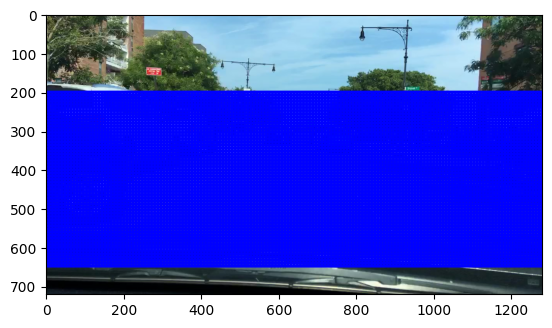

In [61]:
slide_window_params = {
    'x_start_stop': [None, None],
    'y_start_stop': [200, 650],
    'overlapping': 0.5,
    'window_sizes': [(32, 32), (64, 64), (64, 32), (128, 64), (32, 16), (16, 16), (128, 128), (256, 256), (256, 128), (16, 32)]
}

feature_image = frame
windows = slide_window(feature_image, **slide_window_params)     
print(windows)         
window_img = draw_boxes(feature_image, windows, color=(0, 0, 255), thick=6)  
plt.imshow(window_img)
plt.show()